# A python parser for the BRENDA database

This project provides python classes and functions to parse the text file containing the entire BRENDA enzyme database (https://www.brenda-enzymes.org)

This is an ongoing project!

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from parseBRENDA import BRENDA
workDir = 'C:/Users/tinta/OneDrive/Documents/Projects/BRENDA'
dataFile = workDir + '/brenda_download.txt'

## 1. Parsing BRENDA

In [2]:
# Let's load the database
brenda = BRENDA(dataFile)
brenda

Number of Enzymes,7558
BRENDA copyright,"Copyrighted by Dietmar Schomburg, Techn. University Braunschweig, GERMANY. Distributed under the License as stated at http:/www.brenda-enzymes.org"
Parser version,0.0.1
Author,"Semidán Robaina Estévez, 2020"


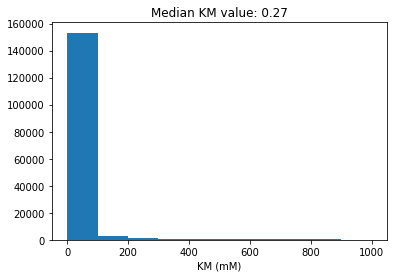

Minimum and maximum values in database: 0.0 mM, 999.8 mM


In [3]:
# Plot all Km values in the database
BRENDA_KMs = np.array([v for r in brenda.reactions 
                       for v in r.KMvalues.get_values()])
values = BRENDA_KMs[(BRENDA_KMs < 1000) & (BRENDA_KMs >= 0)]
plt.hist(values)
plt.title(f'Median KM value: {np.median(values)}')
plt.xlabel('KM (mM)')
plt.show()
print(f'Minimum and maximum values in database: {values.min()} mM, {values.max()} mM')

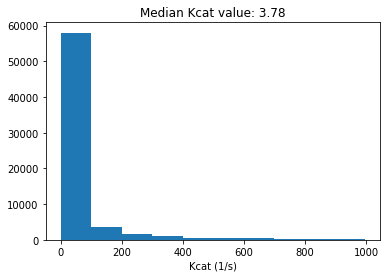

Minimum and maximum values in database: 5.83e-10 1/s, 997.0 1/s


In [4]:
# Plot all Km values in the database
BRENDA_Kcats = np.array([v for r in brenda.reactions 
                       for v in r.Kcatvalues.get_values()])
values = BRENDA_Kcats[(BRENDA_Kcats < 1000) & (BRENDA_Kcats >= 0)]
plt.hist(values)
plt.title(f'Median Kcat value: {np.median(values)}')
plt.xlabel('Kcat (1/s)')
plt.show()
print(f'Minimum and maximum values in database: {values.min()} 1/s, {values.max()} 1/s')

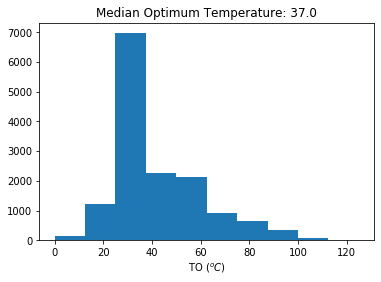

Minimum and maximum values in database: 0.0 °C, 125.0 °C


In [5]:
# Plot all enzyme optimal temperature values in the database
BRENDA_TO = np.array([v for r in brenda.reactions 
                       for v in r.temperature.filter_by_condition(
                           'optimum').get_values()])
values = BRENDA_TO[(BRENDA_TO >= 0)]
plt.hist(values)
plt.title(f'Median Optimum Temperature: {np.median(values)}')
plt.xlabel('TO (${}^oC$)')
plt.show()
print(f'Minimum and maximum values in database: {values.min()} °C, {values.max()} °C')

## 2. Extracting data for _Pyruvate kinase_

In [5]:
# We can retrieve an enzyme entry by its EC number like this
r = brenda.reactions.get_by_id('2.7.1.40')
r

Enzyme identifier,2.7.1.40
Name,Pyruvate kinase
Systematic name,ATP:pyruvate 2-O-phosphotransferase
Reaction type,Phospho group transfer
Reaction,ATP + pyruvate <=> ADP + phosphoenolpyruvate


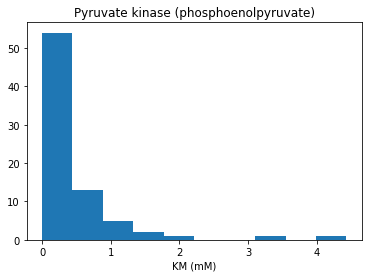

In [6]:
# Here are all the KM values for phosphoenolpyruvate associated with this enzyme class
compound = 'phosphoenolpyruvate'
kms = r.KMvalues.filter_by_compound(compound).get_values()
plt.hist(kms)
plt.xlabel('KM (mM)')
plt.title(f'{r.name} ({compound})')
plt.show()

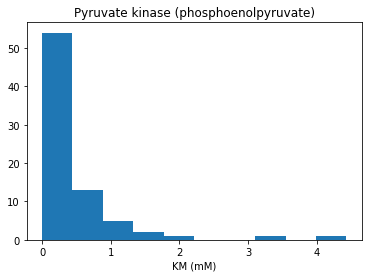

In [7]:
# Here are all the KM values for phosphoenolpyruvate associated with this enzyme class
compound = 'phosphoenolpyruvate'
kms = r.KMvalues.filter_by_compound(compound).get_values()
plt.hist(kms)
plt.xlabel('KM (mM)')
plt.title(f'{r.name} ({compound})')
plt.show()

In [8]:
# And further filtered by organism
r.KMvalues.filter_by_organism('Bos taurus').filter_by_compound('phosphoenolpyruvate').get_values()

[0.051500000000000004, 0.18]

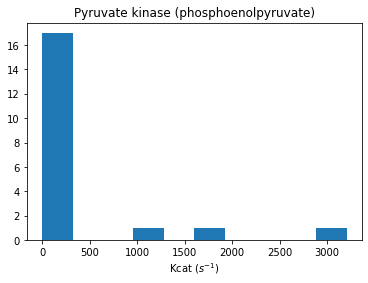

In [9]:
# Here are all the Kcat values for phosphoenolpyruvate associated with this enzyme class
compound = 'phosphoenolpyruvate'
kcats = r.Kcatvalues.filter_by_compound(compound).get_values()
plt.hist(kcats)
plt.xlabel('Kcat ($s^{-1}$)')
plt.title(f'{r.name} ({compound})')
plt.show()

## IDEA TO TEST
Get all KM values for a given species, such as _Escherichia coli_, a compound and compare with measured absolute concentrations. This will give you an idea of how close are KMs to concentrations and hence how saturated enzymes are.

In [15]:
r.references

{'1': ' Kim, J.Y.; Kim, D.Y.; Ro, J.Y.: Granule formation in NGF-culturedmast cells is associated with expressions of pyruvate kinase type M2and annexin I proteins. Int. Arch. Allergy Immunol. (2008) 146,287-297. {Pubmed:18362474}',
 '2': ' Patil, Y.; Junghare, M.; MÃ¼ller, N.: Fermentation of glycerol byAnaerobium acetethylicum and its potential use in biofuel production.Microb. Biotechnol. (2017) 10, 203-217. {Pubmed:28004884}',
 '3': ' Flanders, L.E.; Schloen, L.H.; Sallach, H.J.: Isozymes of pyruvatekinase from the grasfrog. Methods Enzymol. (1975) 42C, 166-175.{Pubmed:}',
 '4': ' Ibsen, K.H.; Chiu, R.H.C.; Park, H.R.; Sanders, D.A.; Roy, S.;Garratt, K.N.; Mueller, M.K.: Purification and properties of mousepyruvate kinases K and M and of a modified K subunit. Biochemistry(1981) 20, 1497-1506. {Pubmed:6784752}',
 '5': ' Baysdorfer, C.; Bassham, J.A.: Spinach pyruvate kinase isoforms.Partial purification and regulatory properties. Plant Physiol. (1984)74, 374-379. {Pubmed:16663425}',

In [10]:
# We can also get information about operational temperatures of the enzyme
temp = r.temperature

In [12]:
temp.filter_by_condition('optimum').get_values()

[30.0,
 37.0,
 95.0,
 22.0,
 23.0,
 44.0,
 28.0,
 40.0,
 55.0,
 45.0,
 -999.0,
 60.0,
 15.0,
 20.5,
 85.0,
 50.0,
 80.0,
 25.0,
 98.0]

In [19]:
print([l['value'] for l in temp['optimum']])

[30.0, 37.0, 95.0, 22.0, 23.0, 44.0, 28.0, 40.0, 55.0, 45.0, -999.0, 60.0, 15.0, 20.5, 85.0, 50.0, 80.0, 25.0, 98.0]


In [20]:
print([l['value'] for l in temp['range']][0])

[35.0, 53.0]


In [22]:
r.substratesAndProducts   

[{'substrates': ['AKT1S1', 'ATP'], 'products': ['ADP', 'phospho-AKT1S1']},
 {'substrates': ['TDP', 'phosphoenolpyruvate'],
  'products': ['TTP', 'pyruvate | 95% yield |']},
 {'substrates': ['ATP', 'pyruvate'],
  'products': ['ADP', 'phosphoenolpyruvate']},
 {'substrates': ['ADP', 'phosphoenolpyruvate'],
  'products': ['ATP', 'pyruvate']},
 {'substrates': ['ATP', 'prothymosin alpha'],
  'products': ['ADP', 'phospho-prothymosin alpha']}]

In [10]:
class Base:
    def print_base(self):
        print('base')
        return self
        
class Child1(Base):
    def print_child1(self):
        print('child1')
        return self
    
class Child2(Base):
    def print_child2(self):
        print('child2')
        return self
    
child1 = Child1()
child2 = Child2()

In [12]:
x = child1.print_base()
x.print_child1()

base
child1


In [4]:
def base(a):
    print('SOY BASE')
    print(a)
    return a

def child1(a):
    print('soy child 1')
    
def child2(a):
    print('soy child 2')
    


In [5]:
@base
def child1(a):
    print('soy child 1')

<function child1 at 0x00000249B6BCFDC8>


In [6]:
child1(1)

soy child 1


In [28]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

def decorator(func):
    def wrapper():
        a = 2
        y = func(a)
        return y
    return wrapper


@my_decorator
def say_whee():
    print("Whee!")

@decorator
def square(x):
    return x**2

@decorator
def cube(x):
    return x**3

In [26]:
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [27]:
square()

4

In [29]:
cube()

8